In [7]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [8]:
df = pd.read_csv(r'..\Data\Bank customers.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
df.shape

(10127, 21)

## EDA and Data Preprocessing

In [10]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
df.info()

# There are 6 variables with object datatype, will need to convert to integer 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

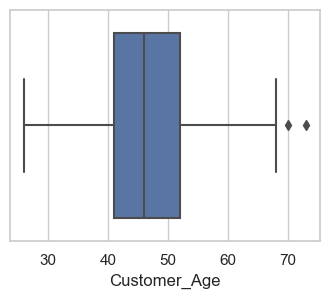

In [12]:
# Univariate analysis on some of the variables

sns.set_theme(style='whitegrid')
plt.figure(figsize=(4, 3))
sns.boxplot(df['Customer_Age'])
plt.show()

# Majority of customers are around in the range 41 to 53. The median value of clients is around 45. Some outliers present

In [13]:
df[['Gender','Credit_Limit']].groupby('Gender').agg(['mean', 'count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [14]:
df[['Gender','Avg_Utilization_Ratio']].groupby('Gender').agg(['mean', 'count'])

# Females tend to use credit card quite often as compared to men

Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

In [15]:
cards = df.groupby('Card_Category')
cards['Customer_Age'].min()

Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64

In [16]:
cards['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

In [17]:
marital = df.groupby('Marital_Status')

In [18]:
marital['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: Card_Category, dtype: int64

In [19]:
# Analyzing Categorical Data

df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [20]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [21]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [22]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [23]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [24]:
# Encoding Categorical Variables

y = df['Card_Category']
x = df.copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Gender'] = label_encoder.fit_transform(x['Gender'])


In [25]:
x['Attrition_Flag'] = label_encoder.fit_transform(x['Attrition_Flag'])

In [26]:
x['Income_Category'] = label_encoder.fit_transform(x['Income_Category'])

In [27]:
x['Income_Category'].value_counts()

4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: Income_Category, dtype: int64

In [28]:
x['Education_Level'] = label_encoder.fit_transform(x['Education_Level'])
x['Marital_Status'] = label_encoder.fit_transform(x['Marital_Status'])

In [29]:
# Dropping 'client ID' and 'Card_Category' from independent variables

x = x.drop(['CLIENTNUM','Card_Category'], axis=1)
x.shape

(10127, 19)

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [31]:
y.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [32]:
y = df[['Card_Category']]
y

,Card_Category
0,Blue
1,Blue
2,Blue
3,Blue
4,Blue
...,...
10122,Blue
10123,Blue
10124,Blue
10125,Blue


In [33]:
# Encoding Target Variable

y['Card_Category'] = label_encoder.fit_transform(y['Card_Category'])
y.head()

,Card_Category
0,0
1,0
2,0
3,0
4,0


In [34]:
y['Card_Category'].value_counts()

0    9436
3     555
1     116
2      20
Name: Card_Category, dtype: int64

In [35]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [36]:
x.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


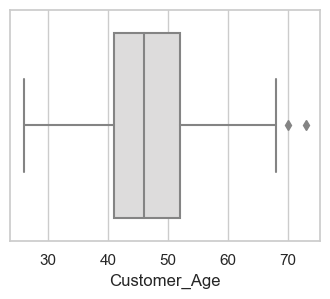

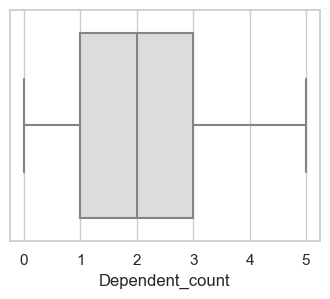

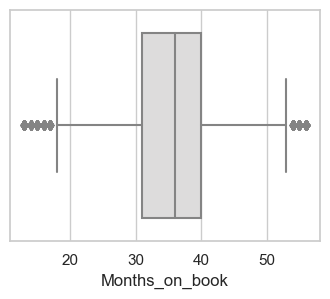

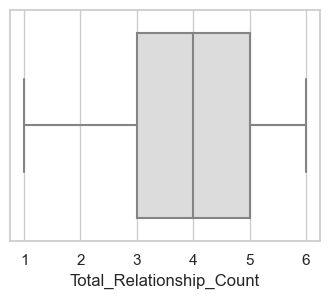

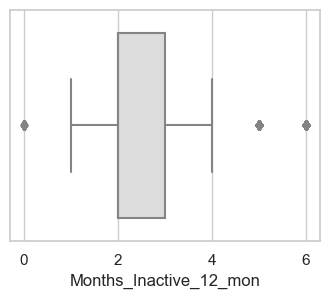

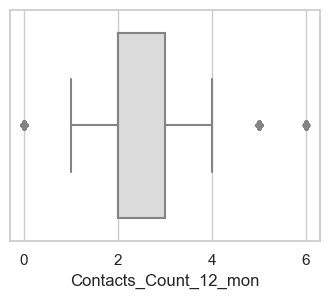

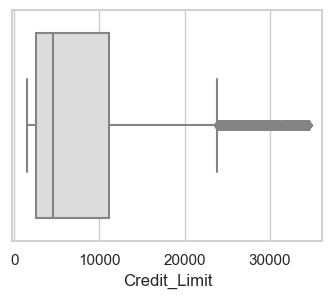

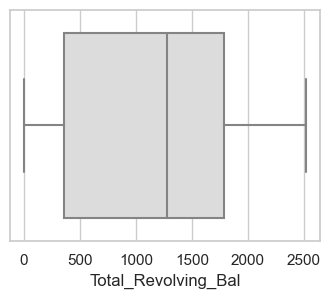

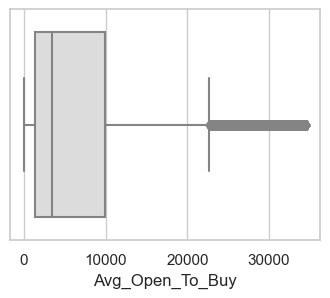

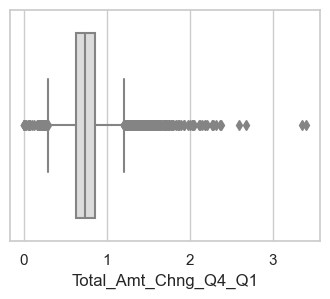

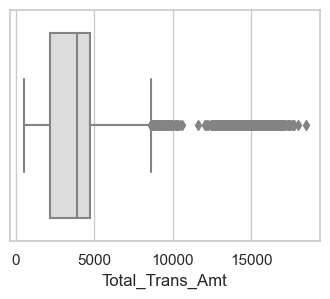

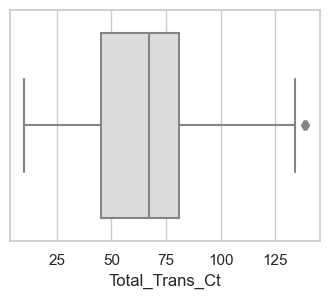

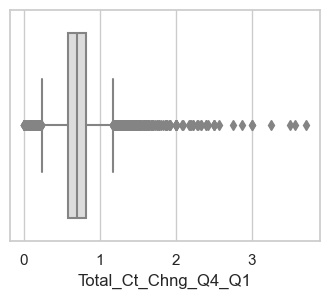

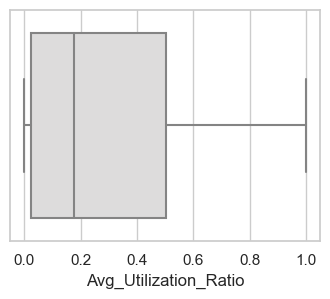

In [37]:
# Outlier checks

ind_vars = df.columns.tolist()[1:]
plotted_cols = [col for col in ind_vars if df[col].dtype != 'object' and df[col].nunique() != 2]


for var in plotted_cols:
   # if df[var].dtype != 'object' and df[var].nunique() != 2:
        plt.figure(figsize=(4, 3))
        sns.boxplot(df[var], palette='coolwarm')
        plt.show()

        
# Presence of ouliers can be seen in most of the columns


In [38]:
# Outlier checks and imputation

df_sel = df[plotted_cols]

# Check the number of outliers per columns
quantiles = df_sel.quantile([0.25, 0.75])
Q1 = quantiles.loc[0.25]
Q3 = quantiles.loc[0.75]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [39]:
((df_sel > upper_bound) | (df_sel < lower_bound)).sum()

Customer_Age                  2
Dependent_count               0
Months_on_book              386
Total_Relationship_Count      0
Months_Inactive_12_mon      331
Contacts_Count_12_mon       629
Credit_Limit                984
Total_Revolving_Bal           0
Avg_Open_To_Buy             963
Total_Amt_Chng_Q4_Q1        396
Total_Trans_Amt             896
Total_Trans_Ct                2
Total_Ct_Chng_Q4_Q1         394
Avg_Utilization_Ratio         0
dtype: int64

In [40]:
df_sel[((df_sel > upper_bound) | (df_sel < lower_bound))] = np.NaN

x[plotted_cols] = df_sel

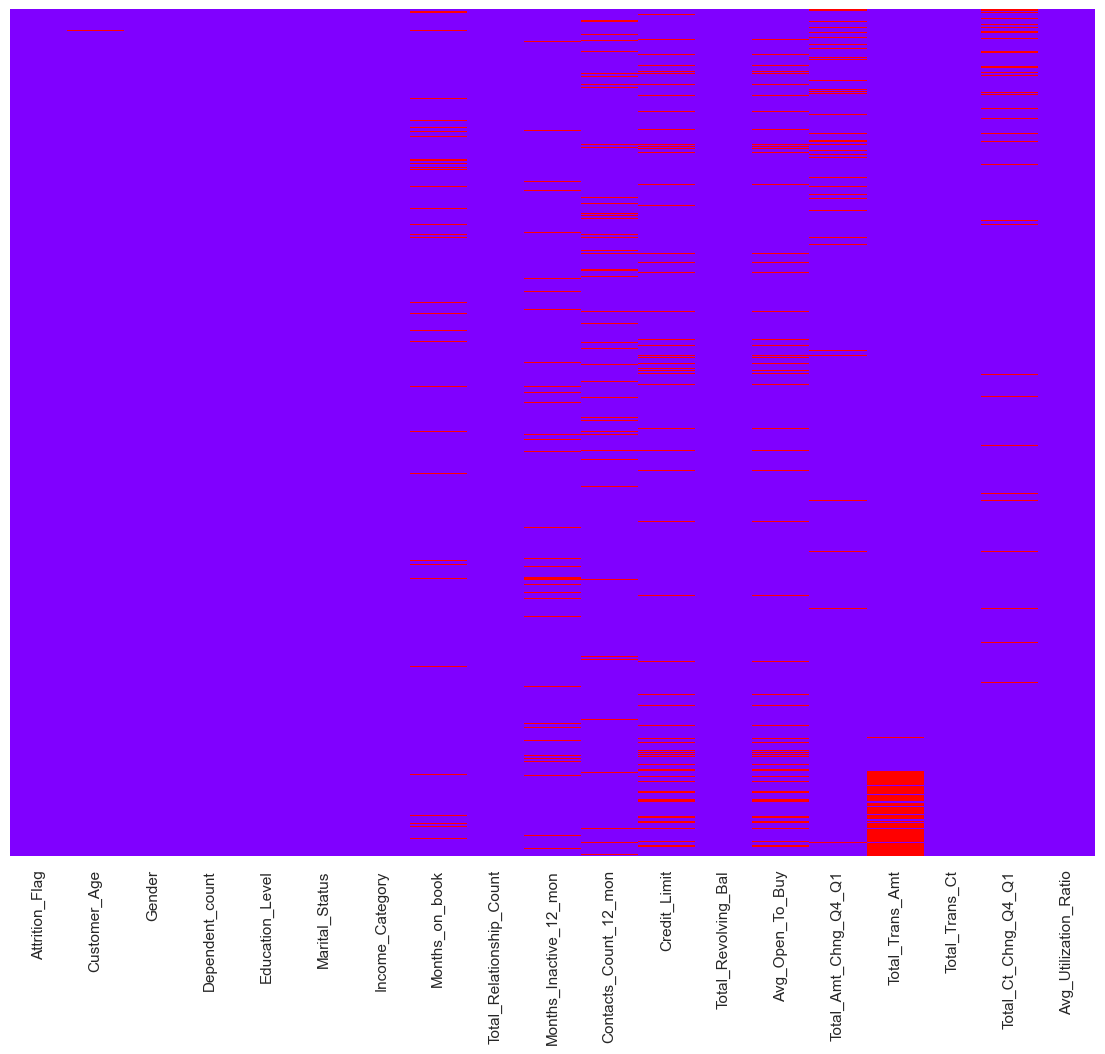

In [41]:
plt.figure(figsize=(14,11))
sns.heatmap(x.isnull(), cbar=False, cmap='rainbow', yticklabels=False)
plt.show()

In [42]:
# Applying capping method by using KNN imputation

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_impute = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
x_impute

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45.0,1.0,3.0,3.0,1.0,2.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,0.7828,1144.0,42.0,0.8412,0.061
1,1.0,49.0,0.0,5.0,2.0,2.0,4.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,0.7648,1291.0,33.0,0.7442,0.105
2,1.0,51.0,1.0,3.0,2.0,1.0,3.0,36.0,4.0,1.0,2.8,3418.0,0.0,3418.0,0.7050,1887.0,20.0,0.5718,0.000
3,1.0,40.0,0.0,4.0,3.0,3.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,0.8256,1171.0,20.0,0.8286,0.760
4,1.0,40.0,1.0,3.0,5.0,1.0,2.0,21.0,5.0,1.0,3.2,4716.0,0.0,4716.0,0.8498,816.0,28.0,0.8014,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,50.0,1.0,2.0,2.0,2.0,1.0,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.7030,4724.2,117.0,0.8570,0.462
10123,0.0,41.0,1.0,2.0,6.0,0.0,1.0,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.8040,5210.2,69.0,0.6830,0.511
10124,0.0,44.0,0.0,1.0,3.0,1.0,4.0,36.0,5.0,3.0,4.0,5409.0,0.0,5409.0,0.8190,3423.8,60.0,0.8180,0.000
10125,0.0,30.0,1.0,2.0,2.0,3.0,1.0,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.5350,8395.0,62.0,0.7220,0.000


In [43]:
x_impute.isnull().sum().sum()

0

<AxesSubplot:>

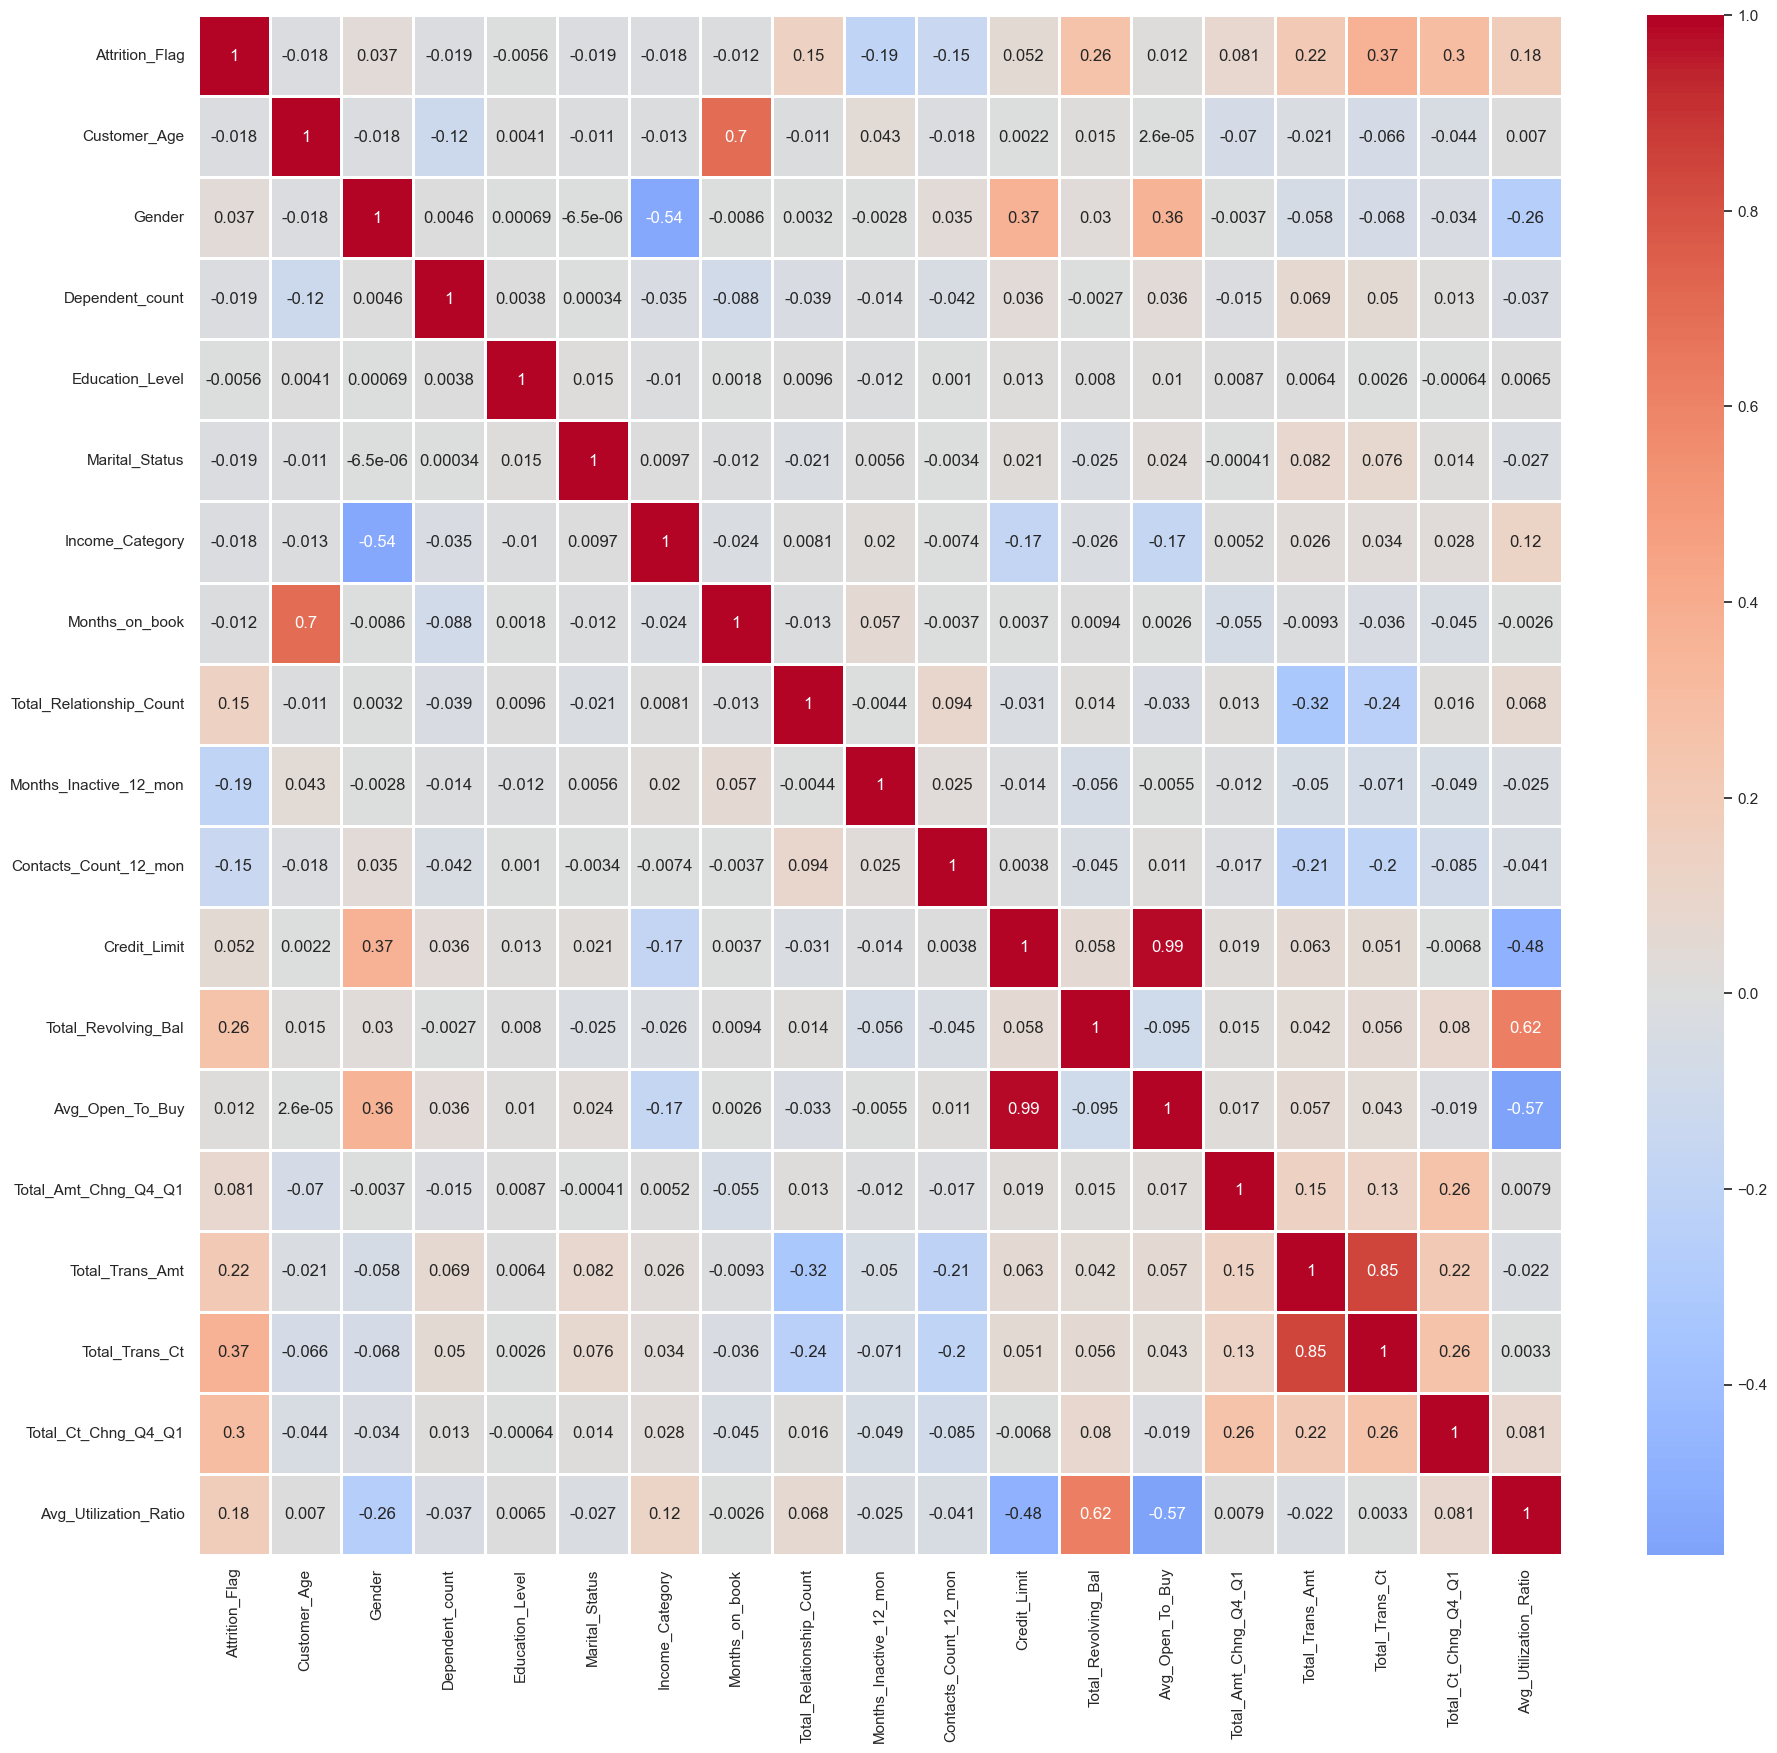

In [44]:
# multivariate Analysis using heatmap

import seaborn as sns

f, ax = plt.subplots(figsize=(22,20))
sns.heatmap(x_impute.corr(), center=0, linewidths=0.8, cmap='coolwarm', annot=True)

# At 80% threshold, we can see collinearity between Credit_Limit & Avg_Open_To_Buy, Total_Trans_Amt & Total_Trans_Ct, 


In [45]:
# Dropping collinear features

x_impute = x_impute.drop(['Avg_Open_To_Buy','Total_Trans_Ct'], axis=1)

In [46]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_impute), columns=x_impute.columns)

In [47]:
x_scaled

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.437506,-0.164953,1.059956,0.503368,-0.052637,-0.628128,-0.574182,0.445884,0.763943,-1.483148,0.560221,1.220896,-0.473422,0.271928,-1.435707,0.837082,-0.775882
1,0.437506,0.334481,-0.943436,2.043199,-0.597678,0.727306,0.755053,1.162399,1.407306,-1.483148,-0.543717,0.361323,-0.366667,0.160789,-1.354243,0.281718,-0.616276
2,0.437506,0.584198,1.059956,0.503368,-0.597678,-0.628128,0.090436,0.015976,0.120579,-1.483148,0.339433,-0.576358,-1.426858,-0.208441,-1.023955,-0.705341,-0.997155
3,0.437506,-0.789247,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.270630,-0.522785,2.064231,-1.647654,-0.596709,1.661686,0.536193,-1.420744,0.764942,1.759686
4,0.437506,-0.789247,1.059956,0.503368,1.037447,-0.628128,-0.574182,-2.133566,0.763943,-1.483148,0.781008,-0.324785,-1.426858,0.685614,-1.617476,0.609211,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.437506,0.459340,1.059956,-0.266547,-0.597678,0.727306,-1.238799,0.589187,-0.522785,-0.300688,0.560221,-0.462976,0.844455,-0.220790,0.548349,0.927543,0.678714
10123,-2.285681,-0.664388,1.059956,-0.266547,1.582489,-1.983561,-1.238799,-1.560355,0.120579,-0.300688,0.560221,-0.409870,1.255524,0.402826,0.817677,-0.068676,0.856458
10124,-2.285681,-0.289812,-0.943436,-1.036462,-0.052637,-0.628128,0.755053,0.015976,0.763943,0.881771,1.664158,-0.190471,-1.426858,0.495442,-0.172300,0.704252,-0.997155
10125,-2.285681,-2.037833,1.059956,-0.266547,-0.597678,2.082739,-1.238799,0.015976,0.120579,0.881771,0.560221,-0.215279,-1.426858,-1.258091,2.582612,0.154614,-0.997155


In [48]:
# Split the data into training and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42,
                                                   stratify=y)

# Building ensemble model

# RandomForest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_rf))
print("*******************************")
print(confusion_matrix(y_test, pred_test_rf))

***************Confusion Matrix*********************
[[7548    0    0    0]
 [   0   93    0    0]
 [   0    0   16    0]
 [   0    0    0  444]]
*******************************
[[1886    0    0    2]
 [  22    0    0    1]
 [   3    0    0    1]
 [  93    0    0   18]]


In [52]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_rf))
print("*******************************")
print(classification_report(y_test, pred_test_rf))

***************classification_report*********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7548
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00       444

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

*******************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1888
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.82      0.16      0.27       111

    accuracy                           0.94      2026
   macro avg       0.44      0.29      0.31      2026
weighted avg       0.92      0.94      0.92      2026



In [53]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf))

***************accuracy_score*********************
1.0
*******************************
0.9397828232971372


# RandomForest Classifier with feature selection part  - recursive feature technique

In [54]:
from sklearn.feature_selection import RFE
rf1 = RandomForestClassifier()
feature_1 = RFE(estimator=rf1, n_features_to_select=15, step=1 )
feature_1 = feature_1.fit(x_train, y_train)

In [55]:
pred_train_rf1 = feature_1.predict(x_train)
pred_test_rf1 = feature_1.predict(x_test)

In [56]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf1))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf1))

***************accuracy_score*********************
1.0
*******************************
0.9343534057255676


In [57]:
# cross validation method
from sklearn.model_selection import cross_val_score
rf_rfe_training = cross_val_score(feature_1, x_train, y_train, cv=10)
print(rf_rfe_training)
print()
print(rf_rfe_training.mean())

[0.93464858 0.94074074 0.93703704 0.93580247 0.93580247 0.93333333
 0.94074074 0.93703704 0.93703704 0.93950617]

0.9371685619034571


# GradientBoosting Model

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [59]:
pred_train_gb = gb.predict(x_train)
pred_test_gb = gb.predict(x_test)

In [60]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_gb))
print("*******************************")
print(accuracy_score(y_test, pred_test_gb))

***************accuracy_score*********************
0.9779039624737687
*******************************
0.9550839091806516


In [61]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_gb))
print("*******************************")
print(classification_report(y_test, pred_test_gb))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7548
           1       1.00      0.68      0.81        93
           2       1.00      1.00      1.00        16
           3       0.95      0.68      0.79       444

    accuracy                           0.98      8101
   macro avg       0.98      0.84      0.90      8101
weighted avg       0.98      0.98      0.98      8101

*******************************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1888
           1       0.50      0.13      0.21        23
           2       0.50      0.25      0.33         4
           3       0.79      0.44      0.57       111

    accuracy                           0.96      2026
   macro avg       0.69      0.45      0.52      2026
weighted avg       0.95      0.96      0.95      2026

